### Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")

### Loading the dataset

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking for Null values 

In [3]:
df.isnull().sum()
# imputer = SimpleImputer(missing_values=np.nan, strategy="mean", fill_value=None)

# data["Age"] = imputer.fit_transform( data[["Age"]])
# data['Cabin'] = imputer.fit_transform(data[['Cabin']])
# data['Embarked'] = imputer.fit_transform(data[['Embarked']])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many People have survived?

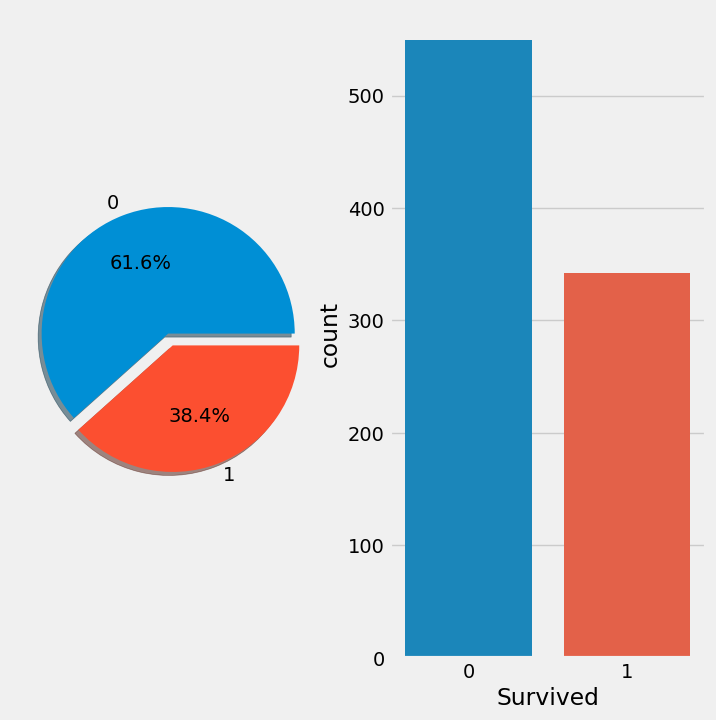

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))

df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data=df, x='Survived', ax=ax[1])
# ax[1].set_title('Survived')

plt.show()

Majority of passengers died.

### Observing the datatype for each variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Analyze whether sex has anything to do with survival

In [6]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

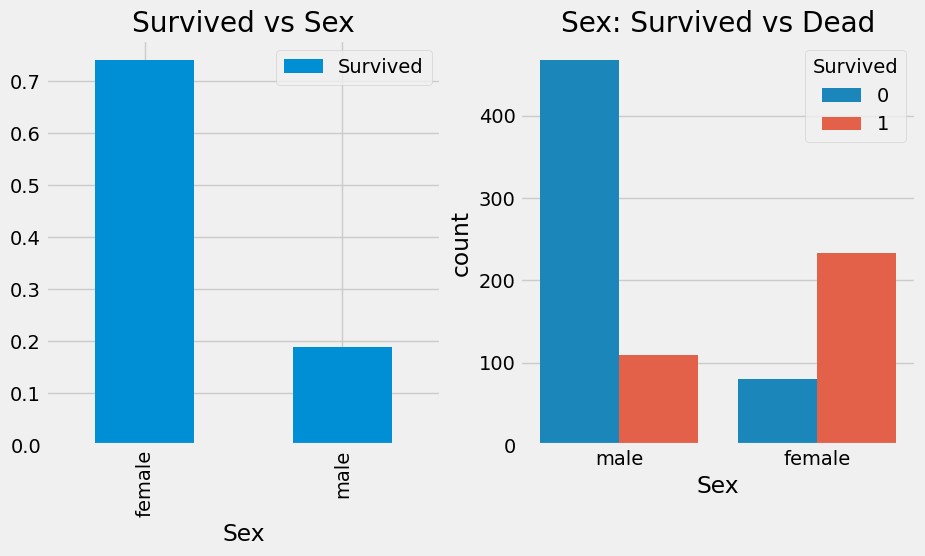

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

We can conclude that although the no. of male was significantly higher than the no .of female on the ship, more no. of females survived the incident as compared to males. And rightfully so, because it is believed that the females and children were given more priority to escape the shrinking ship.

### Were the passengers in the higher passenger class given more priority for survival?

In [8]:
pd.crosstab(df['Pclass'], df['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


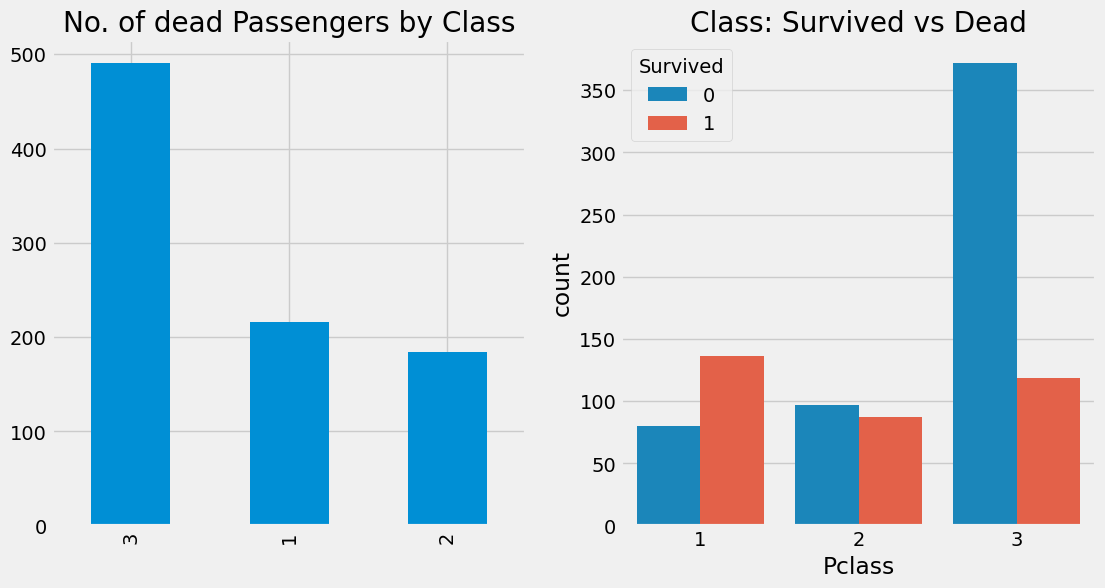

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('No. of dead Passengers by Class')

sns.countplot(data=df, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Class: Survived vs Dead')

plt.show()

In [10]:
pd.crosstab([df['Sex'], df['Survived']], df['Pclass'], margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

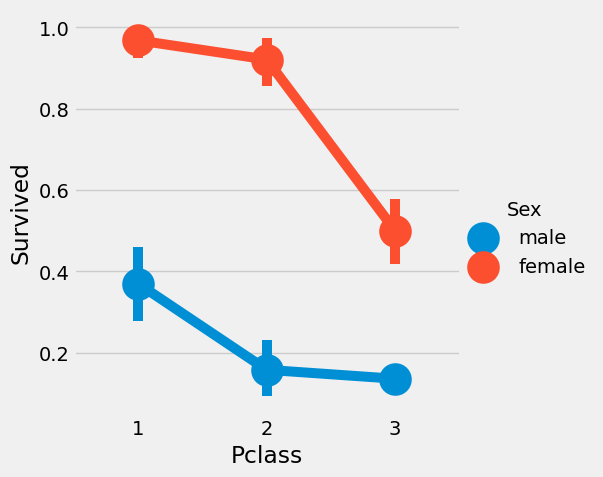

In [11]:
sns.catplot(data=df, x='Pclass', y='Survived', hue='Sex', kind="point") # factor plot
plt.show()

Clearly, the passengers at class 1 were given higher priority for survival. And passenger class 3 had the most no. of casualties. It seems to help a lot when you are a female cruising on the Class 1.

### Did Age have anything to do with Survival Rate?

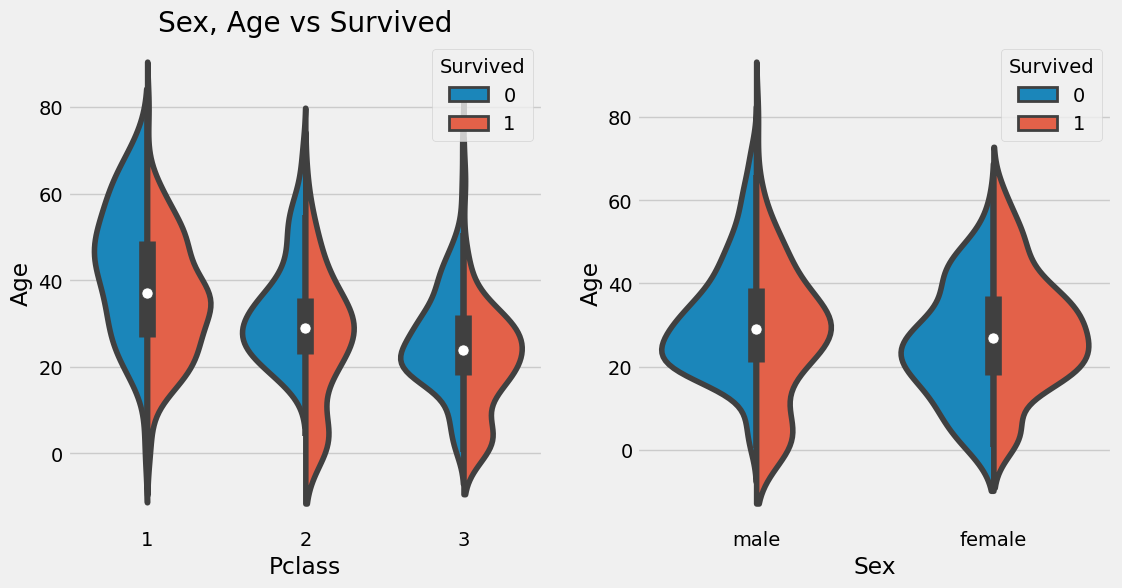

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_title('Passenger Class, Age vs Survived')

sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[0].set_title('Sex, Age vs Survived')

plt.show()

From the above violin plots, we can conclude that young people were given higher chance for survival irrespective of their passenger class and gender.

### Filling the missing values

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df['Initials'] = 0
for i in df:
    df['Initials'] = df['Name'].str.extract('([A-Za-z]+)\.')
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [15]:
pd.crosstab(df['Initials'], df['Sex'])

Sex,female,male
Initials,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
df['Initials'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], 
                       ['Mr', 'Other', 'Mrs', 'Mr', 'Mr', 'Other', 'Mrs', 'Mr', 'Master', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Other', 'Mr'], inplace=True)

In [17]:
df.head()
pd.crosstab(df['Initials'], df['Sex'])

Sex,female,male
Initials,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [18]:
df.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
df.loc[( (df['Age'].isnull()) & (df['Initials'] == 'Mr')), 'Age'] = 33
df.loc[( (df['Age'].isnull()) & (df['Initials'] == 'Mrs')), 'Age'] = 36
df.loc[( (df['Age'].isnull()) & (df['Initials'] == 'Master')), 'Age'] = 5
df.loc[( (df['Age'].isnull()) & (df['Initials'] == 'Miss')), 'Age'] = 22
df.loc[( (df['Age'].isnull()) & (df['Initials'] == 'Other')), 'Age'] = 46

In [20]:
df['Age'].isnull().sum()

0

### Checking the distribution of the data based on age for survival

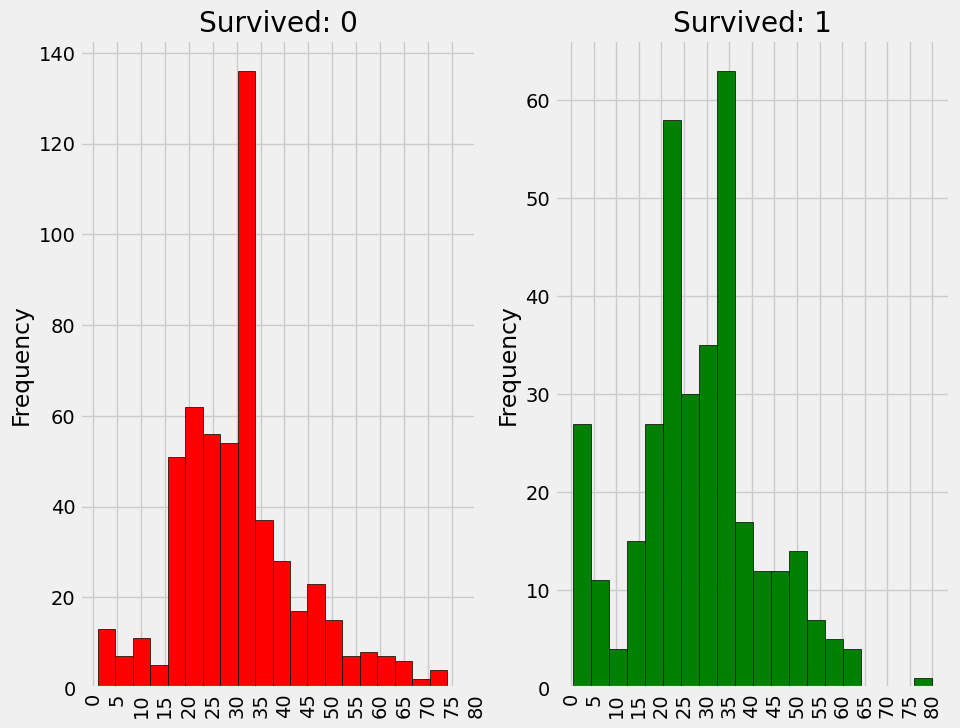

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

df[df['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived: 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

df[df['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived: 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)

plt.show()

We can conlclude that age group 30-35 had the most casualities. Similarly, age group 20-35 survived the most.

### Does being a women or a girl or a child have anything to do with the survival rate?

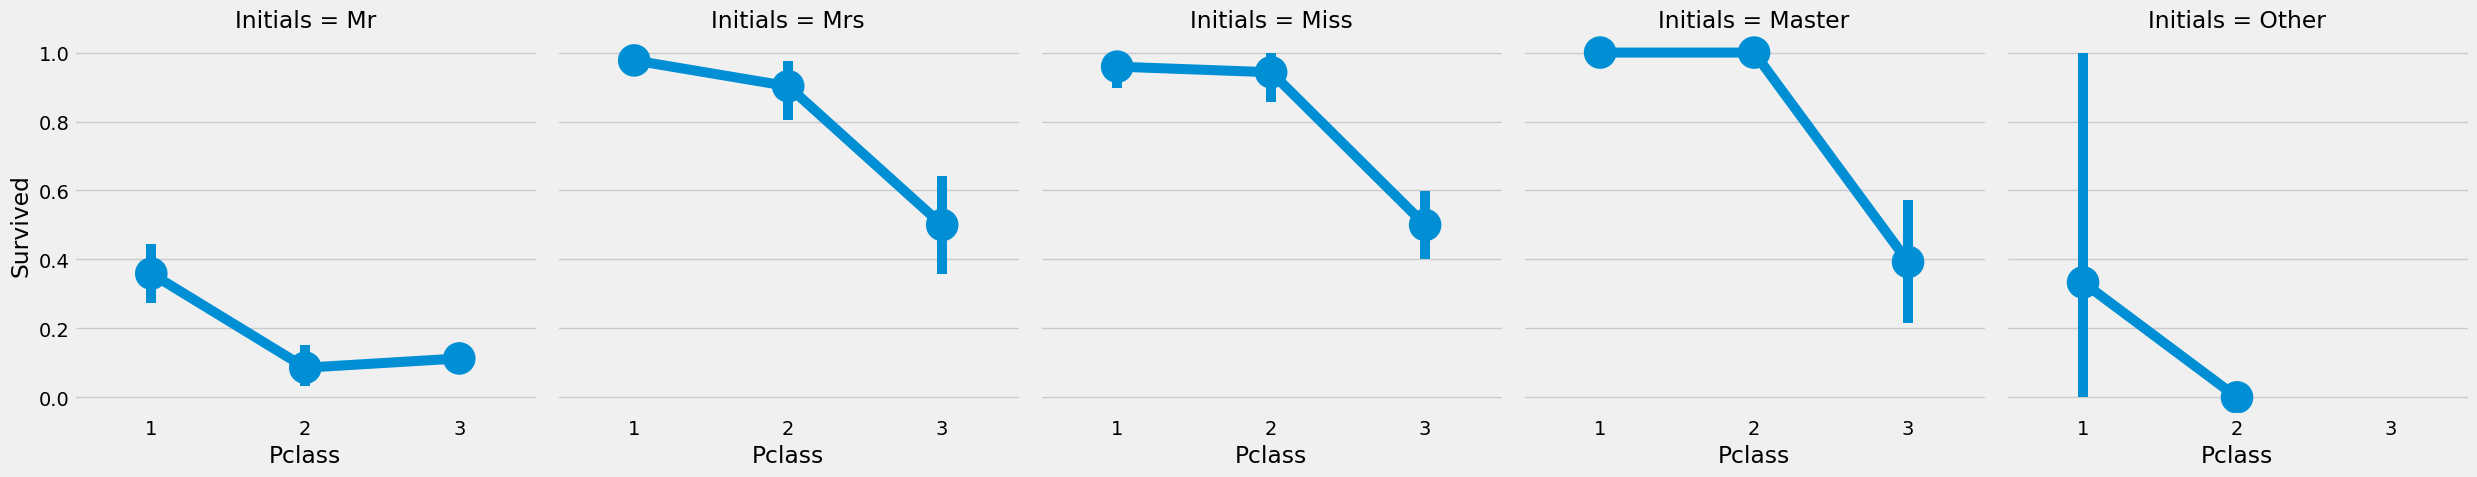

In [28]:
sns.catplot(data=df, x='Pclass', y='Survived', col='Initials', kind="point") # factor plo

plt.show()

### Relationship between Port of Embarkation and Passenger Class

In [30]:
pd.crosstab([df['Embarked'], df['Pclass']], [df['Sex'], df['Survived']], margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

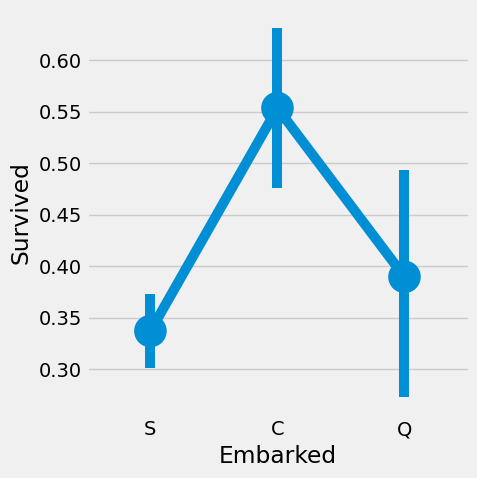

In [34]:
sns.catplot(data=df, x='Embarked', y='Survived', kind='point')
plt.show()

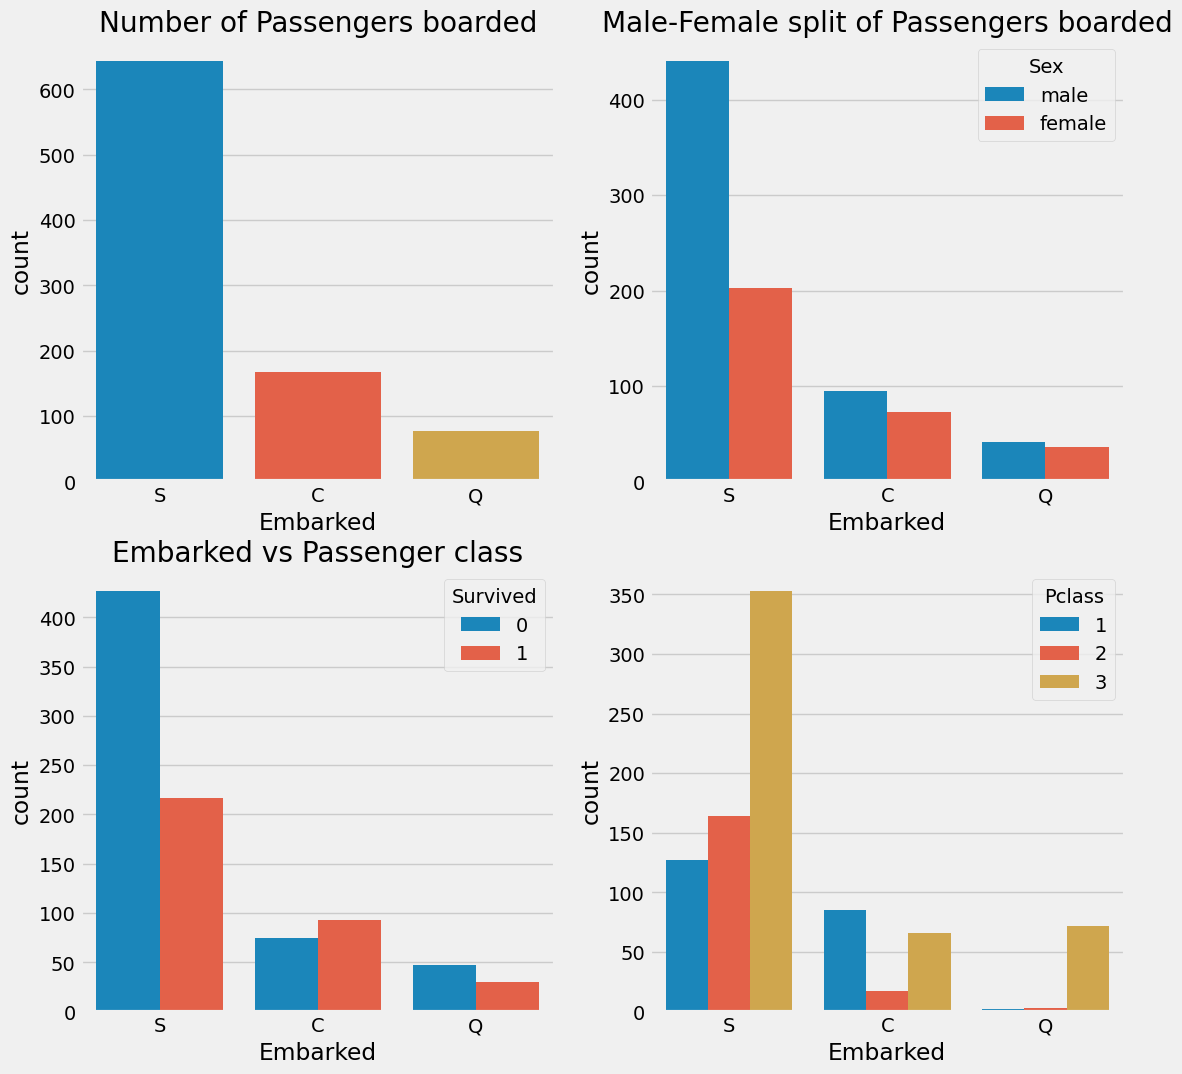

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

sns.countplot(data=df, x='Embarked', ax=ax[0, 0])
ax[0, 0].set_title('Number of Passengers boarded')

sns.countplot(data=df, x='Embarked', hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('Male-Female split of Passengers boarded')

sns.countplot(data=df, x='Embarked', hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('Survived vs Passengers boarded')

sns.countplot(data=df, x='Embarked', hue='Pclass', ax=ax[1, 1])
ax[1, 0].set_title('Embarked vs Passenger class')

plt.show()

High number of passengers boarded from port S.    
From each of the ports, number of male is higher than th number of female.  
Port C has the highest survival to death ratio.  
From each port, the number of passengers from class 3 is the highest.

### Relationship between Port of Embarkation and Sex for survival

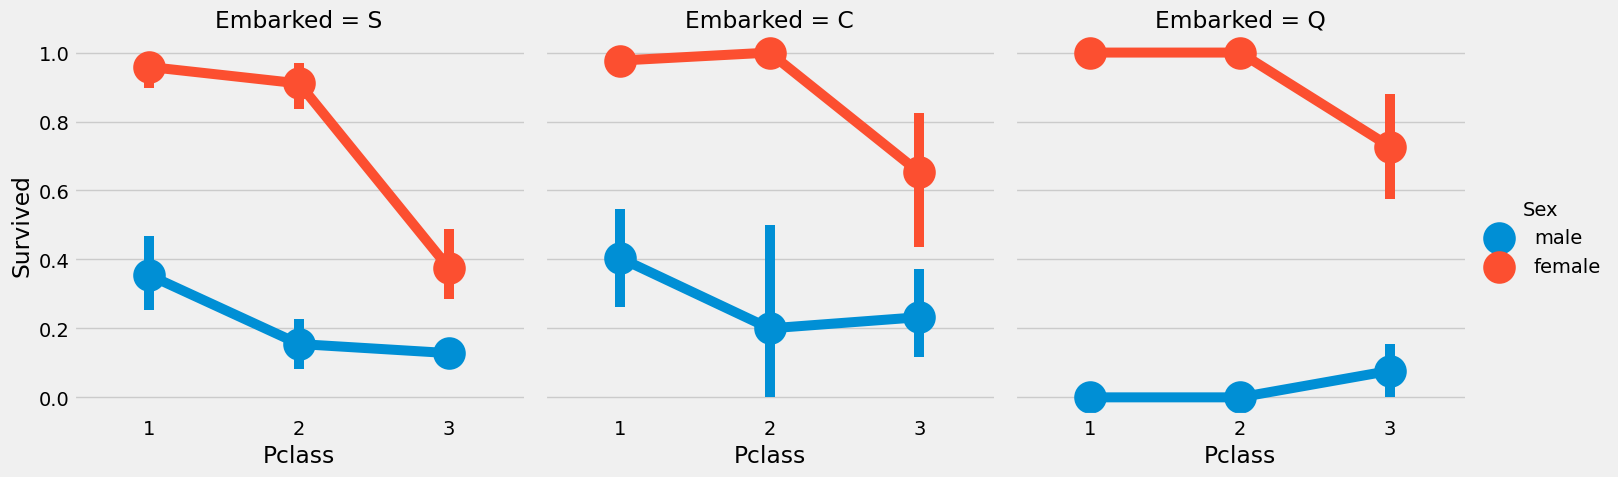

In [39]:
sns.catplot(data=df, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point')
plt.show()

Irrespective of port, female were given higher chance of survival as compared to male.  
Port Q seems to be the unluckiest for men.

### Missing value in Embarked column

In [46]:
df['Embarked'].isnull().sum()
df['Embarked'].fillna('S', inplace=True) # using mode
df['Embarked'].isnull().sum()

0

### Check if the passengers who survived boarded alone or were with their family members

In [53]:
df['SibSp'].unique() # 1: if the passenger was with their family members

array([1, 0, 3, 4, 2, 5, 8])

In [55]:
pd.crosstab(df['SibSp'], df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


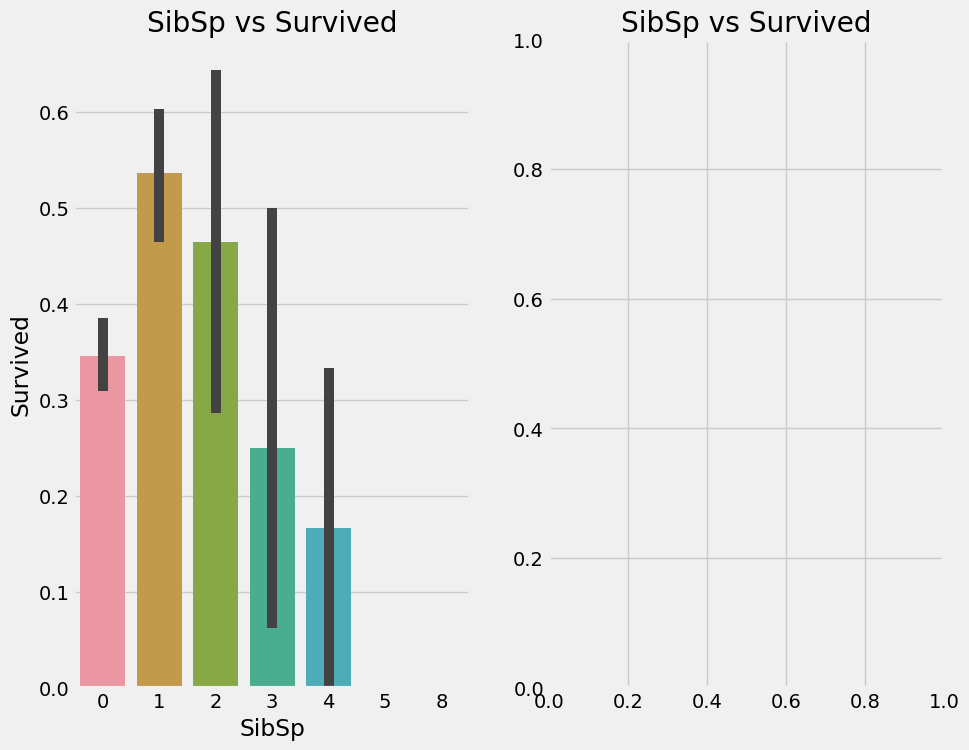

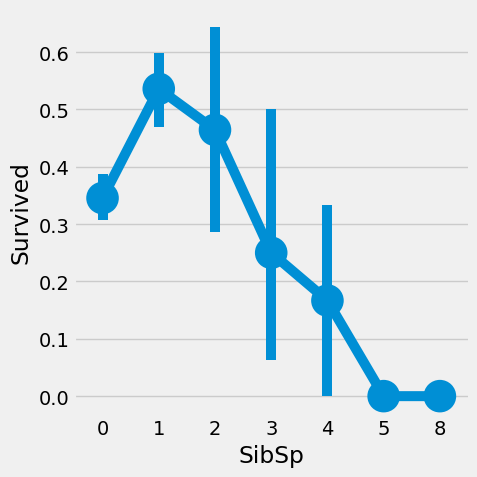

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

sns.barplot(data=df, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp vs Survived')


sns.catplot(data=df, x='SibSp', y='Survived', kind='point', ax=ax[1])
ax[1].set_title('SibSp vs Survived')


plt.show()

### Fares in each passenger class

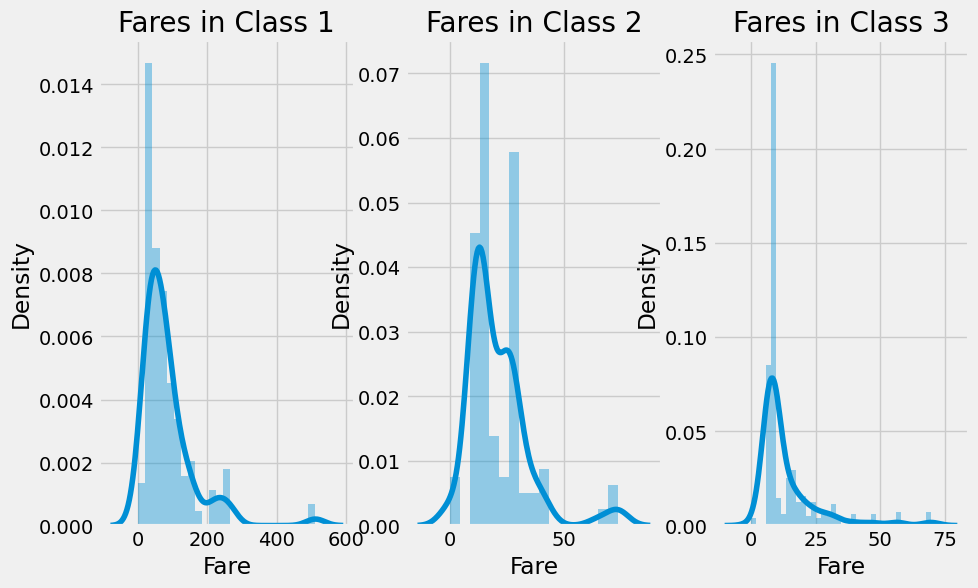

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

sns.distplot(df[df['Pclass'] == 1]['Fare'], ax=ax[0])
sns.distplot(df[df['Pclass'] == 2]['Fare'], ax=ax[1])
sns.distplot(df[df['Pclass'] == 3]['Fare'], ax=ax[2])

ax[0].set_title('Fares in Class 1')
ax[1].set_title('Fares in Class 2')
ax[2].set_title('Fares in Class 3')

plt.show()

### Correlation between variables

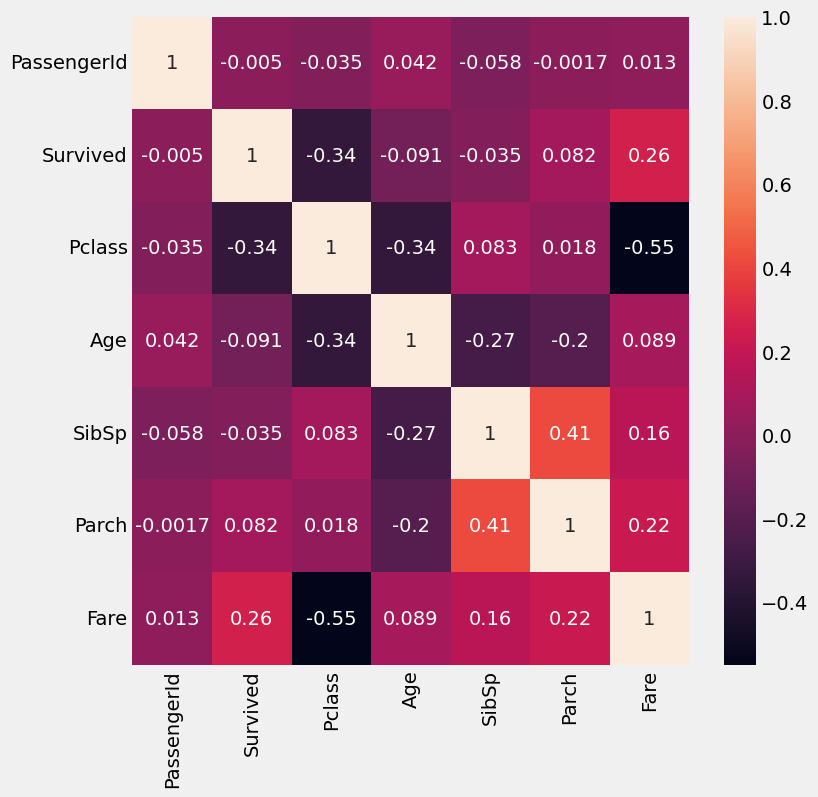

In [73]:
plt.figure(figsize=(8, 8))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

### Preprocessing - Converting continuous variable to categorical: Age column

In [77]:
df['Age_cat'] = 0

df.loc[df['Age'] <= 16, 'Age_cat'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age_cat'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 50), 'Age_cat'] = 2
df.loc[(df['Age'] > 50) & (df['Age'] <= 70), 'Age_cat'] = 3
df.loc[(df['Age'] > 70), 'Age_cat'] = 4

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [79]:
df['Age_cat'].value_counts()

1    382
2    341
0    104
3     59
4      5
Name: Age_cat, dtype: int64

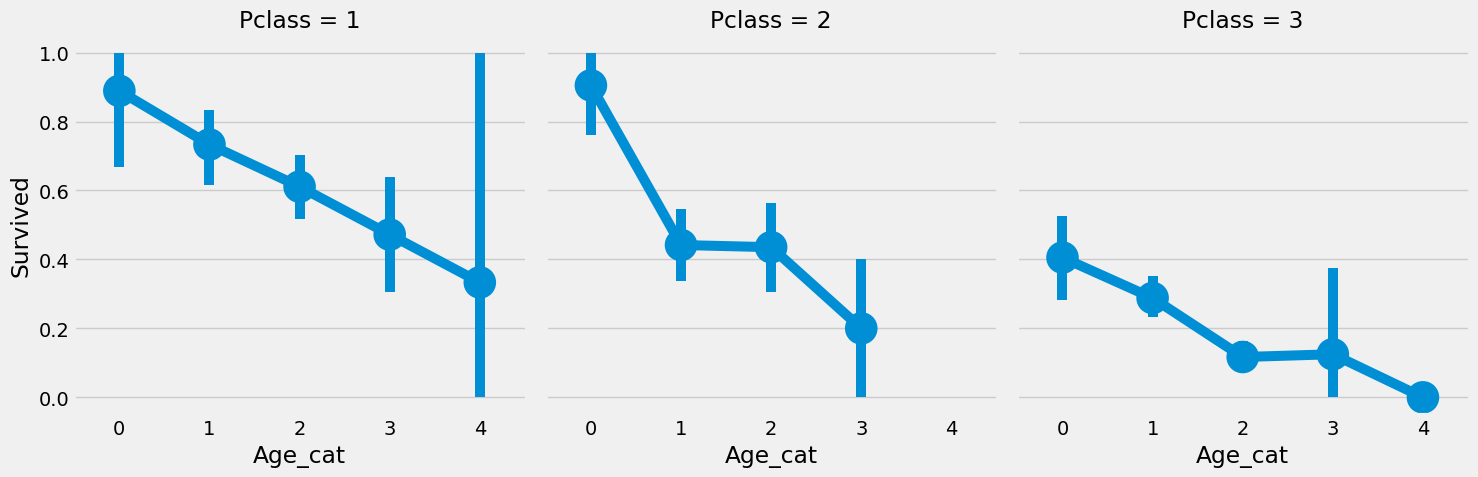

In [80]:
sns.catplot(data=df, x='Age_cat', y='Survived', col='Pclass', kind='point')
plt.show()

Children in each class were given higher survival chance.

### Summary

Sex: Women had more chance of survival than men.  
Passenger Class: Class 1 > Class 2 > Class 3.  
Age: Children with age group 5-10 had higher chance of survival.  
    People between age group 15-35 mostly died.  
Embarked: Port C had higher survival ratio.  